In [60]:
import numpy as np

# 손실 함수

In [61]:
def mean_squared_error(y_hat, y):
    return 0.5 * np.sum((y_hat-y) ** 2)

In [62]:
y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_hat = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(mean_squared_error(np.array(y_hat), np.array(y)))

t = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(mean_squared_error(np.array(y_hat), np.array(y)))

0.09750000000000003
0.0


In [63]:
def cross_entropy_error(y_hat, y):
    delta = 1e-7
    
    return -np.sum(y * np.log(y_hat + delta))

In [64]:
y = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y_hat = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(cross_entropy_error(np.array(y_hat), np.array(y)))

y = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
y_hat = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

print(cross_entropy_error(np.array(y_hat), np.array(y)))

0.510825457099338
2.302584092994546


In [65]:
def one_hot_encoder(dataset, n_labels=10):
    one_hot = np.zeros((len(dataset), n_labels))

    for i, idx in enumerate(dataset):
        one_hot[i, idx] = 1
    return np.array(one_hot)

# 미니배치 학습

In [66]:
from tensorflow import keras

mnist = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train , X_test = X_train/255., X_test/255.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
y_train, y_test = one_hot_encoder(y_train), one_hot_encoder(y_test)

print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [67]:
# 무작위로 10장 빼내기
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # train_size 미만의 정수 중 batch_size만큼 선택
X_batch = X_train[batch_mask]
y_batch = y_train[batch_mask]

In [68]:
# 배치용 교차 엔트로피
def cross_entropy_error(y_hat, y):
    if y_hat.ndim == 1:
        y = y.reshape(1, y.size)
        y_hat = y_hat.reshape(1, y_hat.size)
    
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat)) / batch_size

In [69]:
# 정답 레이블이 원-핫 인코딩이 아닌 경우
def cross_entropy_error(y_hat, y):
    if y_hat.ndim == 1:
        y = y.reshape(1, y.size)
        y_hat = y_hat.reshape(1, y_hat.size)
    
    batch_size = y_hat.shape[0]
    return -np.sum(y * np.log(y_hat[np.arange(batch_size), y])) / batch_size

# 미분

## 수치 미분

In [70]:
# 나쁜 구현의 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h

반올림 오차를 일으킨다 (너무 작은 값을 이용하면 컴퓨터로 계산하는 데 문제가 됨)

In [71]:
# 중앙 차분을 이용
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 *h)

In [72]:
# y = 0.01x^2 + 0.1x를 미분하기
def function_1(x):
    return 0.01*x**2 + 0.1*x

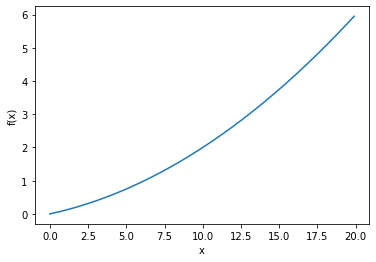

In [73]:
# 함수 그리기
import matplotlib.pyplot as plt

x = np.arange(0., 20., 0.1)
y = function_1(x)

plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [74]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


## 편미분

In [75]:
# f(x_0, x_1) = {x_0}^2 + {x_1}^2 미분하기
def function_2(x):
    return x[0] ** 2 + x[1] ** 2 # 또는 np.sum(x ** 2)

In [76]:
# x_0 = 3, x_1 = 4일 때 x_0에 대한 편미분 구하기
def function_tmp1(x0):
    return x0 * x0 + 4.0 ** 2.0
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [77]:
# x_0 = 3, x_1 = 4일 때 x_1에 대한 편미분 구하기
def function_tmp2(x1):
    return 3.0 * 2.0 + x1 * x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 기울기

In [78]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val # 값 복원

    return grad

In [79]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


## 경사하강법

In [80]:
# 간단한 구현
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

In [81]:
# 경사하강법으로 f(x_0, x_1) = {x_0}^2 + {x_1}^2의 최솟값 구하기
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [82]:
# 학습률이 너무 큰 예
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [83]:
# 학습률이 너무 작은 예
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

학습률이 너무 크면 큰 값으로 발산해버리고, 너무 작으면 거의 갱신되지 않은 채 끝나버림

## 신경망에서의 기울기

In [84]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [85]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        

    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [86]:
# 교재 코드가 오류나서 공식 repo 코드로 대체, nditer 사용하여 데이터 순회
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()   
        
    return grad

In [87]:
class SimpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3) # 정규분포로 초기화
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, y):
        z = self.predict(x)
        y_hat = softmax(z)
        loss = cross_entropy_error(y_hat, y)

        return loss

In [88]:
net = SimpleNet()
print(net.W)
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
print(np.argmax(p))
y = np.array([0, 0, 1])
print(net.loss(x, y))

[[-0.39436366  1.15275724 -0.82261675]
 [-0.42389286 -0.90141556  0.37253852]]
[-0.61812177 -0.11961966 -0.15828538]
1
0.9823814941051662


In [89]:
# 기울기 구하기
def f(W):
    return net.loss(x, y)

net = SimpleNet()
x = np.array([0.6, 0.9])
y = np.array([0, 0, 1])
print(net.W)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.41096048 -0.84819075 -0.40341438]
 [-0.33811968  2.02880031  0.22827445]]
[[ 0.10041176  0.39703188 -0.49744364]
 [ 0.15061764  0.59554782 -0.74616545]]


# 학습 알고리즘 구현하기

## 2층 신경망 학습 구현하기

In [90]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [91]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
      # 가중치 초기화
      self.params = {}
      self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
      self.params["b1"] = np.zeros(hidden_size)
      self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
      self.params["b2"] = np.zeros(output_size)
  
  def predict(self, x):
      W1, W2 = self.params["W1"], self.params["W2"]
      b1, b2 = self.params["b1"], self.params["b2"]

      a1 = np.dot(x, W1) + b1
      z1 = sigmoid(a1)
      a2 = np.dot(z1, W2) + b2
      y = softmax(a2)

      return y
  def loss(self, x, y):
      y_hat = self.predict(x)

      return cross_entropy_error(y_hat, y)
  
  def accuracy(self, x, y):
      y_hat = self.predict(x)
      y_hat = np.argmax(y_hat, axis=1)
      y = np.argmax(y, axis=1)

      accuracy = np.sum(y_hat == y) / float(x.shape[0])

      return accuracy

  def numerical_gradient(self, x, y):
      loss_W = lambda W: self.loss(x, y)

      grads = {}
      grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
      grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
      grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
      grads["b2"] = numerical_gradient(loss_W, self.params["b2"])

      return grads

In [92]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params["W1"].shape)
print(net.params["b1"].shape)
print(net.params["W2"].shape)
print(net.params["b2"].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [93]:
# 예측 처리 실행
x = np.random.rand(100, 784) # 100장 분량의 더미 입력 데이터
y_hat = net.predict(x)

In [94]:
# 기울기 계산
x = np.random.rand(100, 784) # 100장 분량의 더미 입력 데이터
y = np.random.rand(100, 10) # 100장 분량의 더미 정답레이블

grads = net.numerical_gradient(x, y)
print(grads["W1"].shape)
print(grads["b1"].shape)
print(grads["W2"].shape)
print(grads["b2"].shape)

(784, 100)
(100,)
(100, 10)
(10,)


## 미니배치 학습 구현하기

In [ ]:
from tensorflow import keras

mnist = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train , X_test = X_train/255., X_test/255.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
y_train, y_test = one_hot_encoder(y_train), one_hot_encoder(y_test)

train_loss_list = []

# 하이퍼파라미터
iters_num = 1000
train_size = X_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(X_batch, y_batch)

    # 매개변수 갱신
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(X_batch, y_batch)
    train_loss_list.append(loss)

## 시험 데이터로 평가하기

In [99]:
from tensorflow import keras

mnist = keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train , X_test = X_train/255., X_test/255.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
y_train, y_test = one_hot_encoder(y_train), one_hot_encoder(y_test)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) # 1 epoch 당 반복 수

# 하이퍼파라미터
iters_num = 10000
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    #미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]

    # 기울기 계산
    grad = network.numerical_gradient(X_batch, y_batch)

    # 매개변수 갱신
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(X_batch, y_batch)
    train_loss_list.append(loss)

    # 1 epoch 당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, y_train)
        test_acc = network.accuracy(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"train acc, test acc | {train_acc}, {test_acc}")

train acc, test acc | 0.09863333333333334, 0.0958


KeyboardInterrupt: ignored